In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f
from datetime import datetime
from scipy.stats import chi2_contingency
from scipy.stats import chi2
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
plt.style.use('seaborn')

# Setup and Inspection

In [40]:
df = pd.read_csv('life.csv')

In [41]:
df.shape

(2938, 22)

In [42]:
df['Life expectancy '].describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64

In [43]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

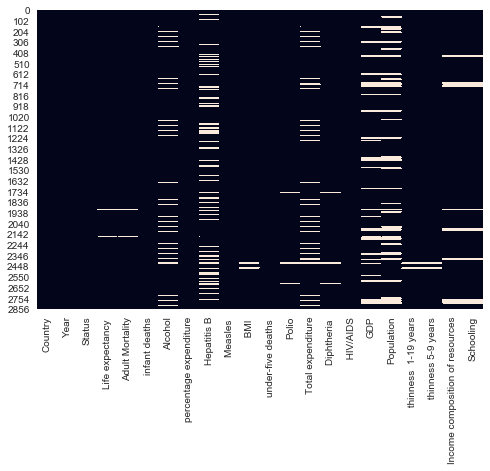

In [44]:
sns.heatmap(df.isna(), cbar=False)

In [45]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [46]:
corr = df.corr()

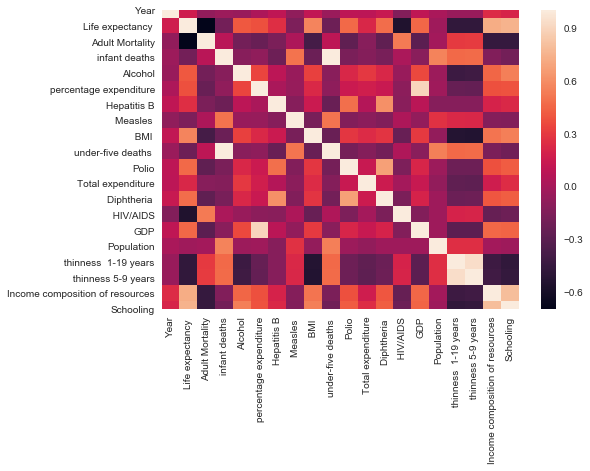

In [47]:
sns.heatmap(corr)

# Dropping and Imputing

In [48]:
df2 = df.drop(columns=['Hepatitis B'])

In [49]:
df2.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles ',
       ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Imputing

In [50]:
df2.Population = df.Population.fillna(df.Population.median())

In [51]:
df2.GDP = df.GDP.fillna(df.GDP.median())

In [52]:
df2.Schooling = df.Schooling.fillna(df.Schooling.median())

In [53]:
df2['Total expenditure'] = df['Total expenditure'].fillna(df['Total expenditure'].median())

In [54]:
df2['Income composition of resources'] = df['Income composition of resources'].fillna(df['Income composition of resources'].median())

In [55]:
df2.Alcohol = df.Alcohol.fillna(df.Alcohol.median())

## Dropping

In [56]:
df2 = df2.dropna(subset =['Life expectancy ',])

In [57]:
df2 = df2.dropna()

In [58]:
df2.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [59]:
corr = df2.corr()

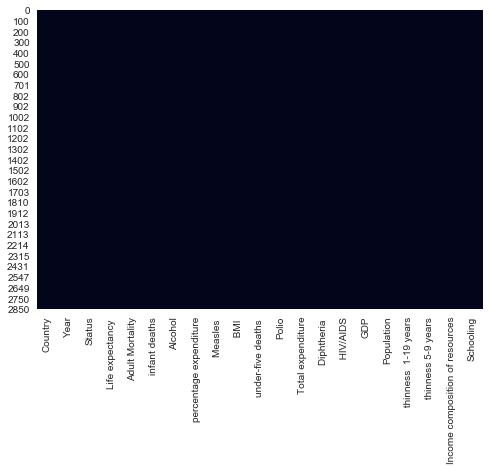

In [60]:
sns.heatmap(df2.isna(), cbar=False)

In [61]:
df2.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [62]:
renamed = []
for i in df2.columns:
    renamed.append(i.lower().strip().replace(' ', '_').replace('-','_').replace('/','_'))

In [63]:
rename_dict = dict(zip(df2.columns, renamed))

In [64]:
rename_dict

{'Country': 'country',
 'Year': 'year',
 'Status': 'status',
 'Life expectancy ': 'life_expectancy',
 'Adult Mortality': 'adult_mortality',
 'infant deaths': 'infant_deaths',
 'Alcohol': 'alcohol',
 'percentage expenditure': 'percentage_expenditure',
 'Measles ': 'measles',
 ' BMI ': 'bmi',
 'under-five deaths ': 'under_five_deaths',
 'Polio': 'polio',
 'Total expenditure': 'total_expenditure',
 'Diphtheria ': 'diphtheria',
 ' HIV/AIDS': 'hiv_aids',
 'GDP': 'gdp',
 'Population': 'population',
 ' thinness  1-19 years': 'thinness__1_19_years',
 ' thinness 5-9 years': 'thinness_5_9_years',
 'Income composition of resources': 'income_composition_of_resources',
 'Schooling': 'schooling'}

In [65]:
df2.rename(columns=rename_dict, inplace=True)

In [66]:
shorten = {'life_expectancy':'lifex', \
           'percentage_expenditure':'perc_expend', \
           'total_expenditure':'tot_expend', \
          'population':'pop','income_composition_of_resources':'income_comp'}

In [67]:
df2.rename(columns=shorten, inplace=True)

In [68]:
df2

,country,year,status,lifex,adult_mortality,infant_deaths,alcohol,perc_expend,measles,bmi,under_five_deaths,polio,tot_expend,diphtheria,hiv_aids,gdp,pop,thinness__1_19_years,thinness_5_9_years,income_comp,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Transformation and Scaling

In [69]:
# df2['loglife'] = np.log(df['Life expectancy '])

# EDA and Visuals/Correlations

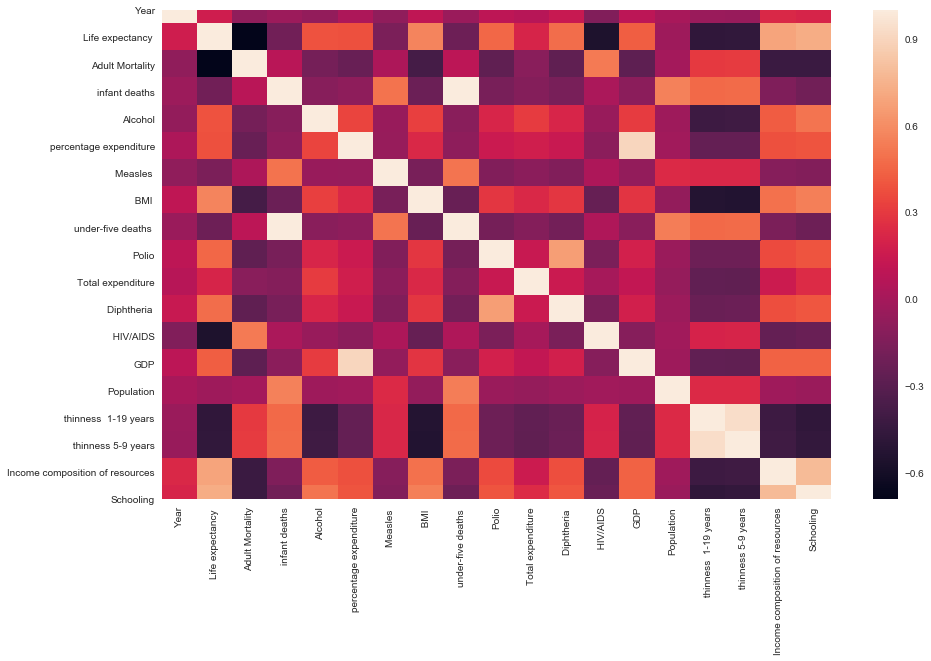

In [70]:
plt.figure(figsize = (15,9))
sns.heatmap(corr)

In [71]:
cols = ['Year', ' BMI ', 'under-five deaths ', \
        'Polio', ' HIV/AIDS', 'GDP', 'Population', \
        'Schooling', ' thinness  1-19 years', \
        'Adult Mortality', 'Life expectancy ', 'Income composition of resources', \
       'Measles ', 'Alcohol']

In [72]:
cols

['Year',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 ' HIV/AIDS',
 'GDP',
 'Population',
 'Schooling',
 ' thinness  1-19 years',
 'Adult Mortality',
 'Life expectancy ',
 'Income composition of resources',
 'Measles ',
 'Alcohol']

In [73]:
# n = 4
# row_groups= [cols[i:i+n] for i in range(0, len(cols), n) ]

In [74]:
# df2['loglife'] = np.log(df['Life expectancy '])

In [75]:
# for i in row_groups:
#     pp = sns.pairplot(data=df2, y_vars=['Life expectancy '],x_vars=i, kind="reg", height=5)

# Model Selection

## OLS Linear Method

In [76]:
# model = ols(formula = 'le~GDP+bmi', data=df2).fit()

In [77]:
# model.summary()

In [78]:
# df2['le'].describe()

## sklearn method

In [79]:
df2.columns

Index(['country', 'year', 'status', 'lifex', 'adult_mortality',
       'infant_deaths', 'alcohol', 'perc_expend', 'measles', 'bmi',
       'under_five_deaths', 'polio', 'tot_expend', 'diphtheria', 'hiv_aids',
       'gdp', 'pop', 'thinness__1_19_years', 'thinness_5_9_years',
       'income_comp', 'schooling'],
      dtype='object')

In [88]:
features = df2.drop(columns=['lifex','country','year','status'])

In [89]:
features


,adult_mortality,infant_deaths,alcohol,perc_expend,measles,bmi,under_five_deaths,polio,tot_expend,diphtheria,hiv_aids,gdp,pop,thinness__1_19_years,thinness_5_9_years,income_comp,schooling
0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,723.0,27,4.36,0.000000,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,715.0,26,4.06,0.000000,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,73.0,25,4.43,0.000000,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,686.0,25,1.72,0.000000,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [82]:
cols = [-1,-2,-4,-7,-9]
RFE_pick = []
for i in cols:
    RFE_pick.append(df2.columns[i])

In [83]:
RFE_pick

['schooling', 'income_comp', 'thinness__1_19_years', 'hiv_aids', 'tot_expend']

In [87]:
from sklearn.linear_model import LinearRegression

In [443]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [444]:
linreg.coef_

array([ 6.18024322e+01,  8.73327708e-02, -3.92306207e-02,  2.07639927e-05,
       -3.08490827e-04])

# Model Tuning

## Recursive Feature Elimination

In [ ]:
features = df2.drop(columns=['lifex','country','year','status'])

In [93]:
target = df2.lifex

### Model with 5 predictors

In [94]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(features, target)

In [95]:
selector.ranking_

array([ 8,  3,  2, 10, 12,  5,  4,  7,  1,  6,  1, 11, 13,  1,  9,  1,  1])

In [99]:
i = selector.ranking_
zipped_rankings = list(zip(i, features))
best_predictors = []
for i in zipped_rankings:
    if i[0] == 1:
        best_predictors.append(i[1])

In [101]:
best_predictors

['tot_expend', 'hiv_aids', 'thinness__1_19_years', 'income_comp', 'schooling']

In [113]:
formula = '+'.join(best_predictors)

In [114]:
formula

'tot_expend+hiv_aids+thinness__1_19_years+income_comp+schooling'

In [116]:
model = ols(formula = f'lifex~{formula}', data=df2).fit()

In [117]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lifex   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1489.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        11:26:41   Log-Likelihood:                -8754.9
No. Observations:                2888   AIC:                         1.752e+04
Df Residuals:                    2882   BIC:                         1.756e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               48.9572      0.540     90.671      0.000      47.899      50.016
tot_expend               0.1935      0.041      4.698      0.000       0.113       0.274
hiv_aids                -0.7255      0.019    -38.075      0.000      -0.763      -0.688
thinness__1_19_years    -0.2111      0.025     -8.544      0.000      -0.260      -0.163
income_comp             10.9329      0.764     14.311      0.000       9.435      12.431
schooling                1.2038      0.051     23.556      0.000       1.104       1.304
==============================================================================
Omnibus:                      267.558   Durbin-Watson:                   0.332
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1321.841
Skew:                          -0.302   Prob(JB):                    9.24e-288
Kurtosis:                       6.259   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Train test on model with 5

### Model with 10 features

In [120]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=10)
selector = selector.fit(features, target)

In [121]:
i = selector.ranking_
zipped_rankings = list(zip(i, features))
best_predictors = []
for i in zipped_rankings:
    if i[0] == 1:
        best_predictors.append(i[1])

In [122]:
formula = '+'.join(best_predictors)

In [123]:
model = ols(formula = f'lifex~{formula}', data=df2).fit()

In [124]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lifex   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     939.5
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        11:29:53   Log-Likelihood:                -8503.1
No. Observations:                2888   AIC:                         1.703e+04
Df Residuals:                    2877   BIC:                         1.709e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               46.7946      0.553     84.591      0.000      45.710      47.879
infant_deaths            0.1104      0.009     11.801      0.000       0.092       0.129
alcohol                  0.1253      0.027      4.620      0.000       0.072       0.179
bmi                      0.0568      0.006     10.138      0.000       0.046       0.068
under_five_deaths       -0.0825      0.007    -11.971      0.000      -0.096      -0.069
tot_expend               0.0996      0.039      2.582      0.010       0.024       0.175
diphtheria               0.0557      0.004     13.578      0.000       0.048       0.064
hiv_aids                -0.6748      0.018    -37.839      0.000      -0.710      -0.640
thinness__1_19_years    -0.1007      0.027     -3.703      0.000      -0.154      -0.047
income_comp              8.2937      0.712     11.648      0.000       6.898       9.690
schooling                0.9195      0.050     18.426      0.000       0.822       1.017
==============================================================================
Omnibus:                      157.396   Durbin-Watson:                   0.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              495.846
Skew:                          -0.214   Prob(JB):                    2.13e-108
Kurtosis:                       4.984   Cond. No.                     1.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Train test on model with 10

### Model with only bmi

In [118]:
model = ols(formula = f'lifex~bmi', data=df2).fit()

In [119]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lifex   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     1368.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):          1.98e-245
Time:                        11:27:08   Log-Likelihood:                -10038.
No. Observations:                2888   AIC:                         2.008e+04
Df Residuals:                    2886   BIC:                         2.009e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.0402      0.314    187.748      0.000      58.424      59.657
bmi            0.2697      0.007     36.984      0.000       0.255       0.284
==============================================================================
Omnibus:                       27.983   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.041
Skew:                          -0.012   Prob(JB):                     1.66e-10
Kurtosis:                       3.611   Cond. No.                         93.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Train test on model with only bmi

In [463]:
 est = selector.estimator_

In [464]:
est.coef_

array([ 6.18024322e+01,  8.73327708e-02, -3.92306207e-02,  2.07639927e-05,
       -3.08490827e-04])

In [459]:
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0,test_size=0.2)

In [465]:
y_train_pred = selector.predict(X_train)
y_test_pred = selector.predict(X_test)

In [466]:
#import the metrics module from sklearn
from sklearn import metrics

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


print('Train Root Mean Squared Error:' , train_rmse)
print('Test Root Mean Squared Error:' , test_rmse)

Train Root Mean Squared Error: 0.7245265779091472
Test Root Mean Squared Error: 0.713270953555076


In [467]:
price_std = target.std()

print('Train Root Mean Squared Error:' , train_rmse/price_std)
print('Test Root Mean Squared Error:', test_rmse/price_std )


Train Root Mean Squared Error: 0.07630257223012518
Test Root Mean Squared Error: 0.0751172008214598


In [469]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [476]:
cv_20_results = np.mean(cross_val_score(linreg, features, target, cv=20, scoring='neg_mean_squared_error'))

In [477]:
cv_20_results

-0.499672282571046

In [ ]:
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

In [ ]:
print('Root Mean Squared Error:' , test_rmse)

In [ ]:
print('Root Mean Squared Error:' , test_rmse/price_std)

In [ ]:
lm = lm.fit(features, target)

In [ ]:
lm